# **Projeto de Aprendizagem de Máquina**
Este projeto tem como objetivo o uso de algoritmos de Machine Learning para a previsão de avaliação do IMDB. 

## Carregando os dados e bibliotecas úteis:

In [ ]:
#Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *


In [ ]:
#Reading the Data 
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d carolzhangdc/imdb-5000-movie-dataset


imdb-5000-movie-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip imdb-5000-movie-dataset.zip

Archive:  imdb-5000-movie-dataset.zip
replace movie_metadata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: movie_metadata.csv      


#Pré-processamento dos Dados


In [ ]:
#ler os dados
movie_df=pd.read_csv("movie_metadata.csv")

In [ ]:
#numero de linhas e colunas
movie_df.shape

(5043, 28)

In [ ]:
#atributos do dataset
movie_df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
#mostrar os primeiros 5
movie_df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
#numero de missing values
movie_df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
# Removendo aqueles que possuem poucos missing values
movie_df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords', 'movie_imdb_link', 'color'],inplace=True)

In [ ]:
movie_df.shape

(4729, 28)

Comparando o tamanho dos vetores, percebe-se que foi perdido aproximadamente 6% do dataset na primeira parte do Pré-processamento.

In [ ]:
#fazer media por causa dos missing values/media do content rating é equivalente a R
movie_df["content_rating"].fillna("R", inplace = True) 
movie_df["aspect_ratio"].fillna(movie_df["aspect_ratio"].median(),inplace=True)
movie_df["budget"].fillna(movie_df["budget"].median(),inplace=True)
movie_df['gross'].fillna(movie_df['gross'].median(),inplace=True)

In [ ]:
#Mostrando que todos os missing values foram removidos
movie_df.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [ ]:
#Removendo valores duplicados
movie_df.drop_duplicates(inplace=True)
movie_df.shape

(4687, 28)

In [ ]:
#Criando uma nova coluna para checar o lucro a partir do ganho bruto e do orçamento
movie_df["Profit"]=movie_df['budget'].sub(movie_df['gross'], axis = 0) 

In [ ]:
#Criando a nova coluna com a porcentaagem de lucro
movie_df['Profit_Percentage']=(movie_df["Profit"]/movie_df["gross"])*100

In [ ]:
#Checando quantos filmes tem de cada país
movie_df["country"].value_counts()

USA               3562
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               23
Japan               21
Italy               20
Hong Kong           15
New Zealand         14
South Korea         12
Russia              11
Ireland             11
Mexico              11
Denmark             11
South Africa         8
Brazil               8
Norway               7
Sweden               5
Netherlands          5
Thailand             4
Iran                 4
Argentina            4
Israel               3
West Germany         3
Switzerland          3
Belgium              3
Czech Republic       3
Romania              2
Taiwan               2
Poland               2
Iceland              2
Hungary              2
Greece               2
Official site        1
Cambodia             1
Afghanistan          1
Indonesia            1
Kyrgyzstan           1
Colombia             1
New Line   

In [ ]:
#Separando os 2 países que mais aparecem e separar em usa, uk e other em novas categorias
value_counts=movie_df["country"].value_counts()
vals = value_counts[:2].index
print (vals)
movie_df['country'] = movie_df.country.where(movie_df.country.isin(vals), 'other')


Index(['USA', 'UK'], dtype='object')


In [ ]:
#Dividimos nessas categorias
movie_df["country"].value_counts()

USA      3562
other     705
UK        420
Name: country, dtype: int64

# Analisando visualmente os dados em gráficos

* Relação entre as avaliações do IMDB e o lucro dos filmes :

       Observa-se que filmes com boas avaliações no IMBD tiveram alto lucro. 

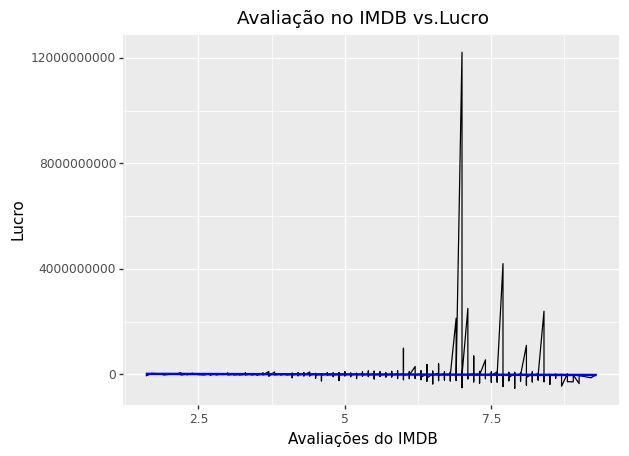

<ggplot: (8780311582117)>

In [ ]:
ggplot(aes(x='imdb_score', y='Profit'), data=movie_df) +\
    geom_line() +\
    labs(title='Avaliação no IMDB vs.Lucro', x='Avaliações do IMDB', y='Lucro') +\
    stat_smooth(colour='blue', span=1)

* Analisando o sucesso comercial com a aclamação da crítica:

      Percebe-se que apenas filmes com baixas avaliações do IMDB ganharam alto valor bruto em dinheiro.

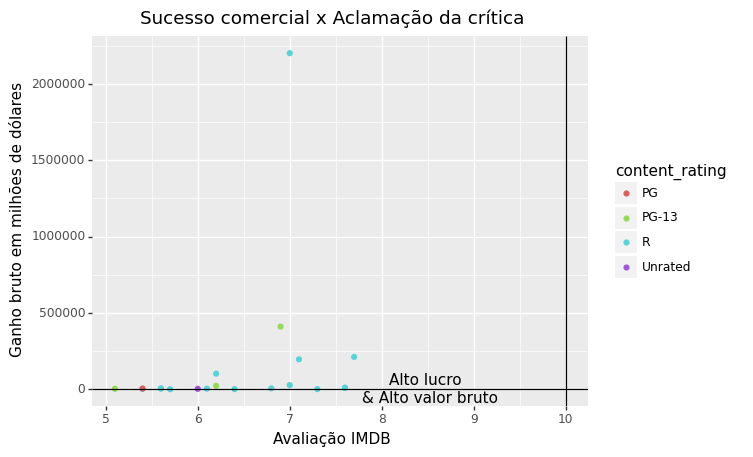

<ggplot: (8780312927413)>

In [ ]:
movie_df= movie_df.sort_values(by ='Profit_Percentage' , ascending=False)
movie_df_new=movie_df.head(20)
(ggplot(movie_df_new)
 + aes(x='imdb_score', y='gross',color = "content_rating")
 + geom_point()
 +  geom_hline(aes(yintercept = 600)) + 
  geom_vline(aes(xintercept = 10)) + 
  xlab("Avaliação IMDB") + 
  ylab("Ganho bruto em milhões de dólares") + 
  ggtitle("Sucesso comercial x Aclamação da crítica") +
  annotate("text", x = 8.5, y = 700, label = "Alto lucro \n & Alto valor bruto"))

* Analisando as avaliações do IMDB para os países no qual os respectivos filmes foram produzidos:

      Nota-se que os filmes que possuem avaliações maiores que 8.75 foram produzidos nos Estados Unidos.

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_smooth.py:206: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


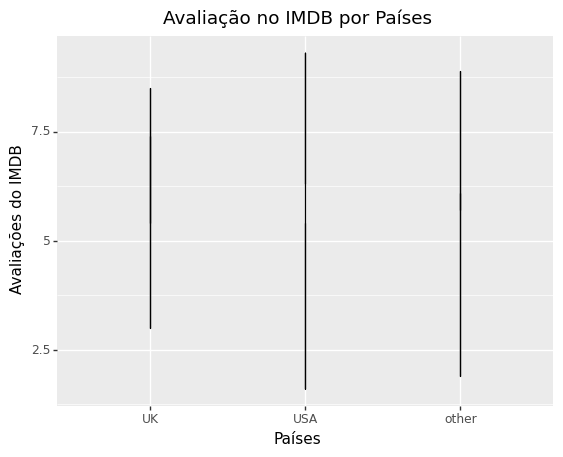

<ggplot: (8780311518585)>

In [ ]:
ggplot(aes(x='country', y='imdb_score'), data=movie_df) +\
    geom_line() +\
    labs(title='Avaliação no IMDB por Países', x='Países', y='Avaliações do IMDB') +\
    stat_smooth(colour='blue', span=1)

* Relação entre as avaliações do IMDB e as curtidas que o respectivo filme 
recebeu no facebook:

      Nota-se que filmes com boas avaliações no IMDB também receberam muitas curtidas no facebook

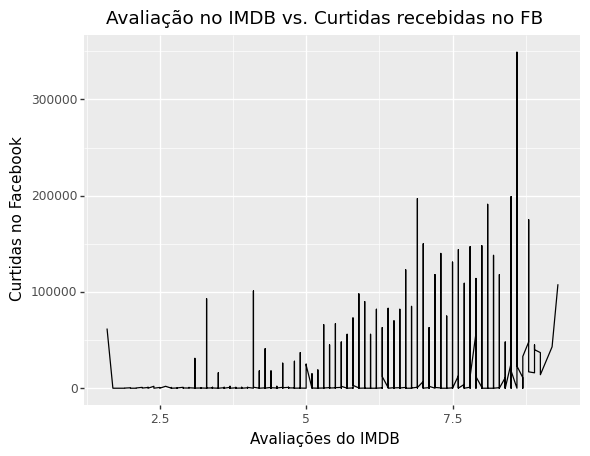

<ggplot: (8780311604601)>

In [ ]:
(ggplot(movie_df)
 + aes(x='imdb_score', y='movie_facebook_likes')
 + geom_line()
 + labs(title='Avaliação no IMDB vs. Curtidas recebidas no FB', x='Avaliações do IMDB', y='Curtidas no Facebook')
)

* Os 15 filmes com maiores lucros:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


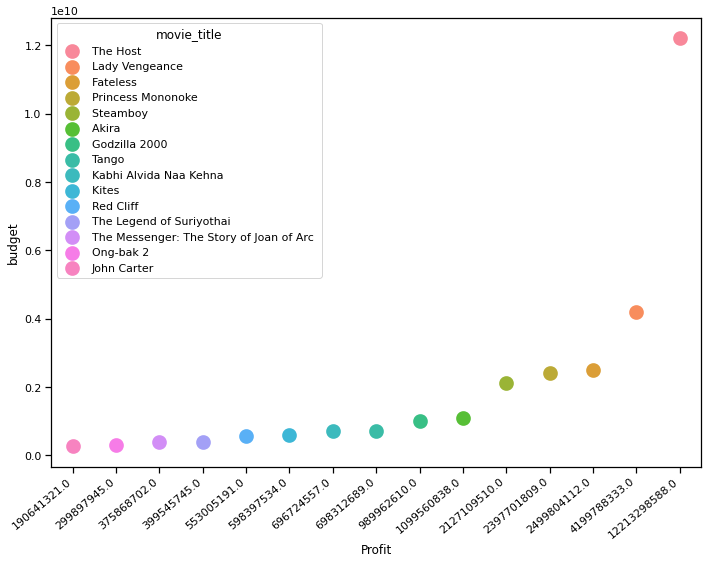

In [ ]:
plt.figure(figsize=(10,8))
movie_df= movie_df.sort_values(by ='Profit' , ascending=False)
movie_df_new=movie_df.head(15)
ax=sns.pointplot(movie_df_new['Profit'], movie_df_new['budget'], hue=movie_df_new['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

* Os 15 filmes mais bem avaliados no IMDB:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


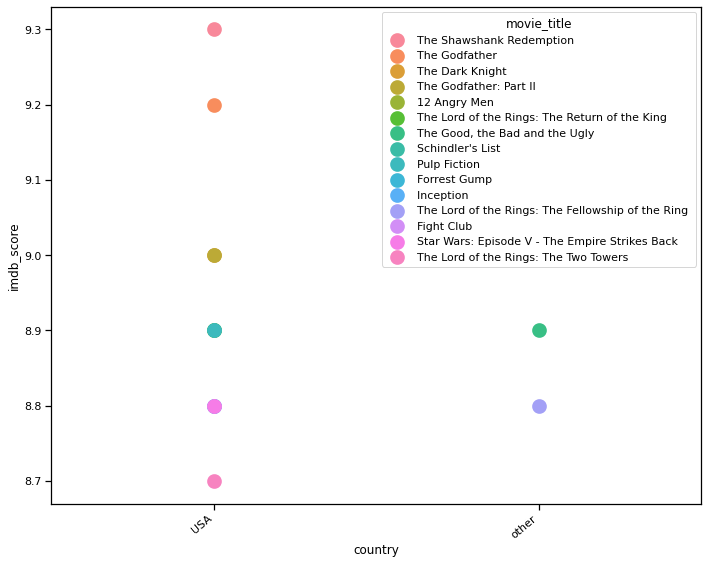

In [ ]:
plt.figure(figsize=(10,8))

movie_df= movie_df.sort_values(by ='imdb_score' , ascending=False)
movie_df_new=movie_df.head(15)
ax=sns.pointplot(movie_df_new['country'], movie_df_new['imdb_score'], hue=movie_df_new['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Finalizando o Pré-processamento

In [ ]:
# Diretores que mais aparecem no Dataset
movie_df['director_name'].value_counts()

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
                    ..
John Badham          1
Stéphane Aubier      1
William Dear         1
Je-kyu Kang          1
Scott Smith          1
Name: director_name, Length: 2236, dtype: int64

In [ ]:
# As palavras-chave quase não se repetem e não agregam muito para a classificação
movie_df['plot_keywords'].value_counts() 


animal name in title|ape abducts a woman|gorilla|island|king kong                    3
based on novel                                                                       3
one word title                                                                       3
alien friendship|alien invasion|australia|flying car|mother daughter relationship    3
dog|gambler|gambling|gangster|professor                                              2
                                                                                    ..
bank robbery|heist|raccoon|rat|squirrel                                              1
1960s|1970s|california|cocaine|wealth                                                1
beach|bottle|jogging|letter|love                                                     1
captain|half brother|klingon|planet|vulcan                                           1
actress name in title|crush|date|four word title|video camera                        1
Name: plot_keywords, Length: 4604, dtype: i

In [ ]:
# A maior parte dos filmes são coloridos
movie_df["color"].value_counts()

Color               4489
 Black and White     198
Name: color, dtype: int64

In [ ]:
# Removendo os nomes de diretor/atores porque não se repetem o suficiente para que sejam relevantes
# no dataset. O mesmo ocorre com keywords, link e color

movie_df.drop('director_name', axis=1, inplace=True)
movie_df.drop('actor_1_name',axis=1,inplace=True)
movie_df.drop('actor_2_name',axis=1,inplace=True)
movie_df.drop('actor_3_name',axis=1,inplace=True)
movie_df.drop('movie_title',axis=1,inplace=True)
movie_df.drop('plot_keywords',axis=1,inplace=True)
movie_df.drop('movie_imdb_link', axis=1, inplace=True)
movie_df.drop('color',axis=1,inplace=True)

In [ ]:
# Removendo a coluna do lucro
movie_df.drop('Profit',axis=1,inplace=True)

In [ ]:
# Removendo a porcentagem de lucro
movie_df.drop('Profit_Percentage',axis=1,inplace=True)

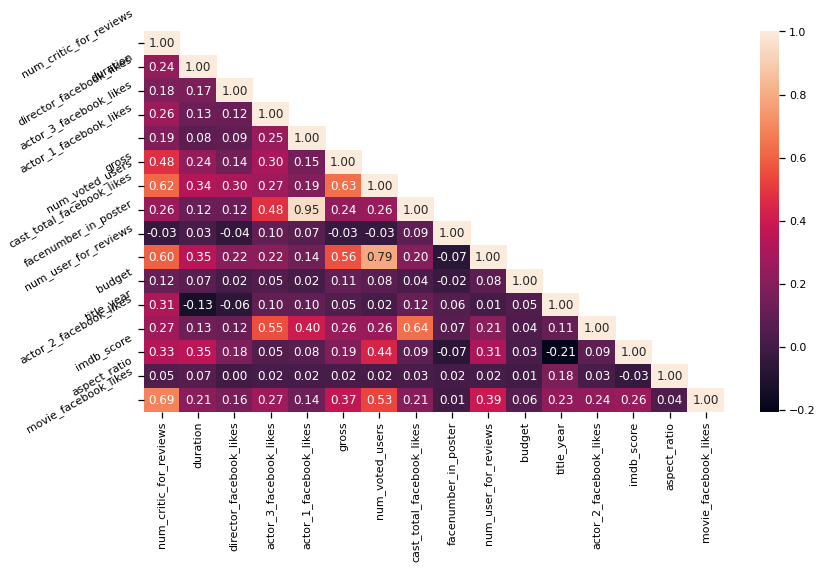

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = movie_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [ ]:
# Adicionando likes de actor 2 e actor 3 juntos e deletando os casos individuais
movie_df['other_actor_facebook_likes']=movie_df["actor_2_facebook_likes"] + movie_df['actor_3_facebook_likes']

movie_df.drop('actor_2_facebook_likes',axis=1,inplace=True)
movie_df.drop('actor_3_facebook_likes',axis=1,inplace=True)
movie_df.drop('cast_total_facebook_likes',axis=1,inplace=True)

# Porcentagem da quantidade de criticas e substituindo
movie_df['critic_review_ratio']=movie_df['num_critic_for_reviews']/movie_df['num_user_for_reviews']

movie_df.drop('num_critic_for_reviews',axis=1,inplace=True)
movie_df.drop('num_user_for_reviews',axis=1,inplace=True)

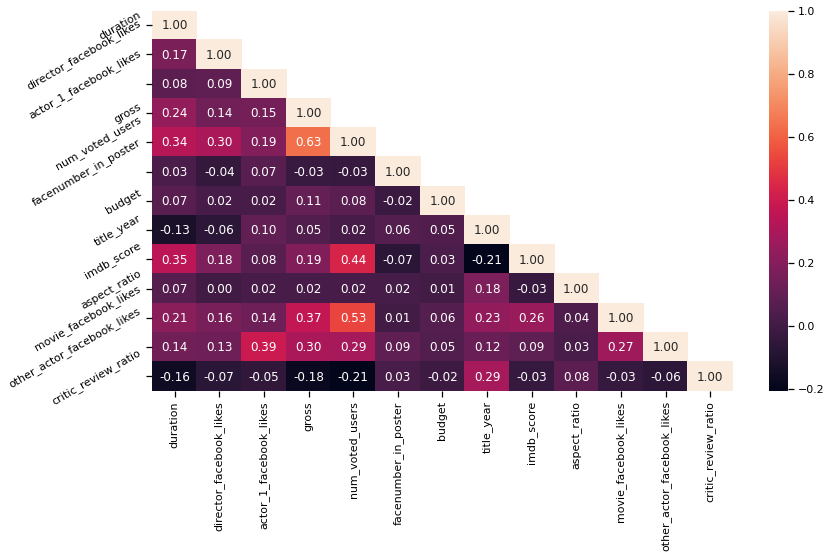

In [ ]:
# Nova matriz com as correções

import matplotlib.pyplot as plt
import seaborn as sns
corr = movie_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [ ]:
# Como não existem tem muitas instâncias entre 0 e 6 então
# se divide em Regular, Bom e Ótimo

movie_df["imdb_binned_score"]=pd.cut(movie_df['imdb_score'], bins=[0,6,8,10], right=True, labels=False)+1

In [ ]:
# Deleta-se a variável imdb_score pois substitui-se pela versão em valores binários
movie_df.drop('imdb_score',axis=1,inplace=True)
movie_df.head(5)

,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,facenumber_in_poster,language,country,content_rating,budget,title_year,aspect_ratio,movie_facebook_likes,other_actor_facebook_likes,critic_review_ratio,imdb_binned_score
0,178.0,0.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,0.0,English,USA,PG-13,237000000.0,2009.0,1.78,33000,1791.0,0.236739,2
1,169.0,563.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,0.0,English,USA,PG-13,300000000.0,2007.0,2.35,0,6000.0,0.243942,2
2,148.0,0.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,1.0,English,UK,PG-13,245000000.0,2015.0,2.35,85000,554.0,0.605634,2
3,164.0,22000.0,27000.0,448130642.0,Action|Thriller,1144337,0.0,English,USA,PG-13,250000000.0,2012.0,2.35,164000,46000.0,0.301000,3
5,132.0,475.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1.0,English,USA,PG-13,263700000.0,2012.0,2.35,24000,1162.0,0.626016,2


In [ ]:
movie_df['imdb_binned_score'].value_counts()

2    3011
1    1473
3     203
Name: imdb_binned_score, dtype: int64

In [ ]:
movie_df = pd.get_dummies(data = movie_df, columns = ['country'] , prefix = ['country'] , drop_first = True)
movie_df = pd.get_dummies(data = movie_df, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)
movie_df.columns

Index(['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'genres', 'num_voted_users', 'facenumber_in_poster',
       'language', 'budget', 'title_year', 'aspect_ratio',
       'movie_facebook_likes', 'other_actor_facebook_likes',
       'critic_review_ratio', 'imdb_binned_score', 'country_USA',
       'country_other', 'content_rating_G', 'content_rating_GP',
       'content_rating_M', 'content_rating_NC-17', 'content_rating_Not Rated',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_Passed',
       'content_rating_R', 'content_rating_TV-14', 'content_rating_TV-G',
       'content_rating_TV-PG', 'content_rating_Unrated', 'content_rating_X'],
      dtype='object')

In [ ]:
# Separando os dados em conjuntos de teste e de treino
X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes',
                        'gross','num_voted_users','facenumber_in_poster','budget','title_year',
                        'aspect_ratio','movie_facebook_likes','other_actor_facebook_likes','critic_review_ratio',
                        'country_USA','country_other','content_rating_G','content_rating_GP','content_rating_M',
                        'content_rating_NC-17','content_rating_Not Rated','content_rating_PG','content_rating_PG-13',
                        'content_rating_Passed','content_rating_R','content_rating_TV-14','content_rating_TV-G','content_rating_TV-PG',
                        'content_rating_Unrated','content_rating_X'],data=movie_df)
y=pd.DataFrame(columns=['imdb_binned_score'],data=movie_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=100,
                                                    stratify=y) 

In [ ]:
# NOrmalizando os dados
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# CLASSIFICADORES

### KNN

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, np.ravel(y_train,order='C'))
knnpred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, knnpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, knnpred))

[[207 235   0]
 [154 748   2]
 [  0  42  19]]
Accuracy: 0.6922530206112296


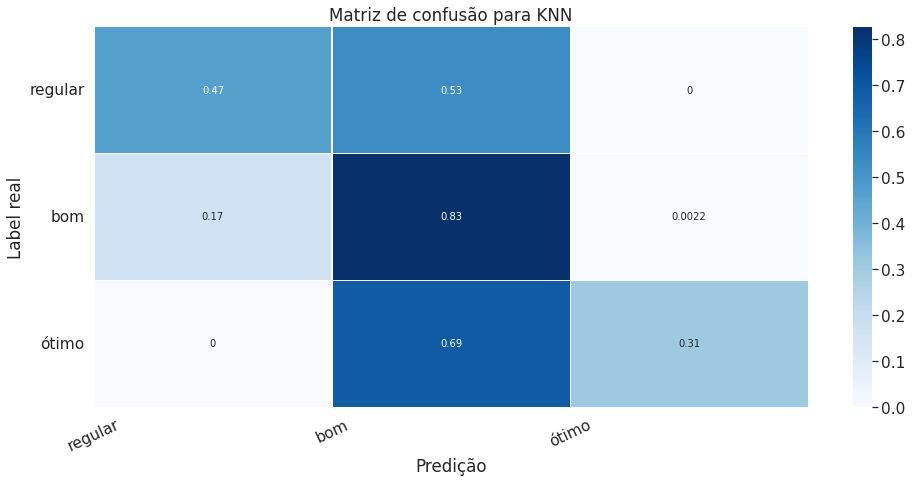

In [ ]:
cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(cnf_matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

class_names = ['regular', 
               'bom', 'ótimo']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predição')
plt.ylabel('Label real')
plt.title('Matriz de confusão para KNN')
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, np.ravel(y_train,order='C'))
rfcpred = rfc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))

[[249 193   0]
 [ 79 824   1]
 [  1  33  27]]
Accuracy: 0.7818052594171997


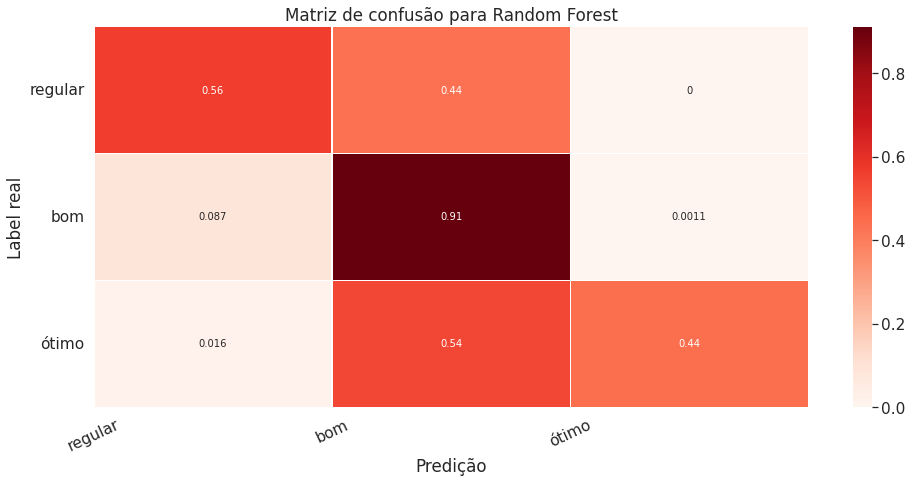

In [ ]:
cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(cnf_matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)

class_names = ['regular', 
               'bom', 'ótimo']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predição')
plt.ylabel('Label real')
plt.title('Matriz de confusão para Random Forest')
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

X_train = preprocessing.minmax_scale(X_train)
X_test = preprocessing.minmax_scale(X_test)

dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, np.ravel(y_train,order='C'))

dtreepred = dtree.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, dtreepred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred))

[[184 252   6]
 [198 644  62]
 [  5  24  32]]
Accuracy: 0.6112295664534471


In [ ]:
from sklearn.metrics import precision_score

y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

score_treino = precision_score(y_train, y_train_pred, average="micro")
score_teste = precision_score(y_test, y_test_pred, average="micro")

print("Score de treino:", score_treino)
print("Score de teste:", score_teste)
print(f"Diferença: {score_treino - score_teste:%}")

Score de treino: 1.0
Score de teste: 0.6112295664534471
Diferença: 38.877043%


ccp_alphas:  [0.0, 0.000202204341631046, 0.0002409280190362881, 0.00026676829268292685, 0.00026676829268292685, 0.0002743902439024391, 0.0002771618625277162, 0.0002771618625277162, 0.00027947154471544717, 0.00028142589118198863, 0.00028142589118198863, 0.00028142589118198863, 0.00028310104529616733, 0.00028385197645079886, 0.00028455284552845534, 0.0002852084972462627, 0.0002858231707317073, 0.0002858231707317073, 0.0002869440459110474, 0.00028883183568677805, 0.00028963414634146335, 0.00029101995565410213, 0.00029101995565410213, 0.0002916224814422058, 0.0002916224814422058, 0.0002916224814422058, 0.00029268292682926823, 0.00029315196998123846, 0.00029315196998123846, 0.00029436501261564317, 0.00029436501261564317, 0.00029448447893569847, 0.0002950432730133751, 0.0002956393200295637, 0.00029744199881023213, 0.0002976190476190475, 0.0002986560477849678, 0.000298900047824008, 0.00029933481152993337, 0.0002998800479808073, 0.0003048780487804878, 0.0003048780487804878, 0.00030487804878048

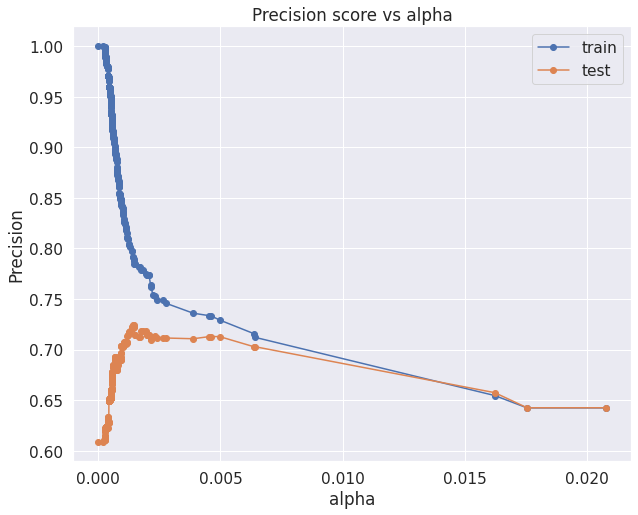

In [ ]:
from sklearn.metrics import roc_auc_score

path = dtree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
print("ccp_alphas: ", list(ccp_alphas)) #Effective alphas of subtree during pruning.
print("impurities: ", list(impurities)) #Sum of the impurities of the subtree leaves for the corresponding alpha value in ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=100, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


print("clfs: ", clfs)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
train_scores = [precision_score(y_train, clf.predict(X_train), average = "micro") for clf in clfs]
test_scores = [precision_score(y_test, clf.predict(X_test), average = "micro") for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

In [ ]:
best_clf = DecisionTreeClassifier(random_state=100, ccp_alpha=0.0005749128919) #XXX 
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0005749128919, random_state=100)

In [ ]:

score_treino = precision_score(y_train, best_clf.predict(X_train), average="micro")
score_teste = precision_score(y_test, best_clf.predict(X_test), average="micro")

print("Score de treino:", score_treino)
print("Score de teste:", score_teste)
print(f"Diferença: {score_treino - score_teste:%}")
#se de treino ficar menos ruim accuracy ficaria melhor

Score de treino: 0.9173780487804878
Score de teste: 0.6780383795309168
Diferença: 23.933967%


In [ ]:
best_clfpred = best_clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, best_clfpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, best_clfpred))

[[158 282   2]
 [119 766  19]
 [  3  28  30]]
Accuracy: 0.6780383795309168


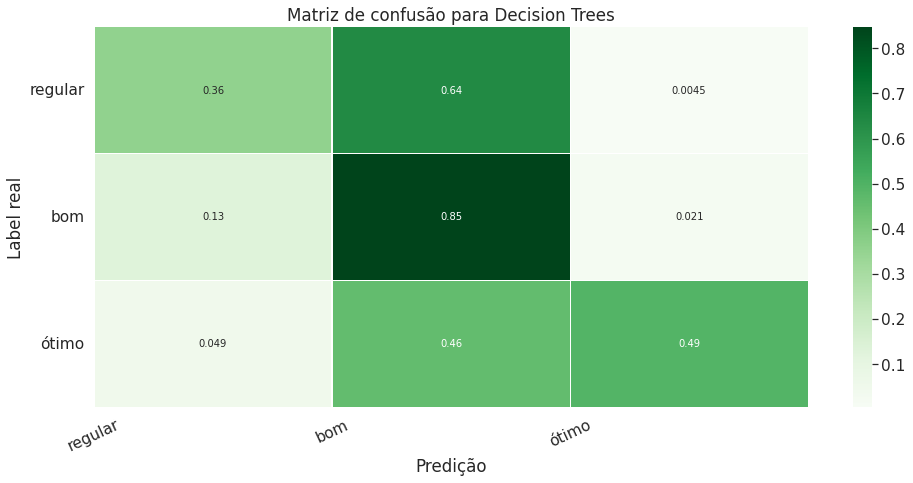

In [ ]:


cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(cnf_matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['regular', 
               'bom', 'ótimo']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predição')
plt.ylabel('Label real')
plt.title('Matriz de confusão para Decision Trees')
plt.show()

# COMPARANDO RESULTADOS

In [ ]:
from sklearn.metrics import classification_report


print('KNN Reports\n',classification_report(y_test, knnpred))
print('Decision Tree Reports\n',classification_report(y_test, dtreepred))
print('Random Forests Reports\n',classification_report(y_test, rfcpred))


KNN Reports
               precision    recall  f1-score   support

           1       0.57      0.47      0.52       442
           2       0.73      0.83      0.78       904
           3       0.90      0.31      0.46        61

    accuracy                           0.69      1407
   macro avg       0.74      0.54      0.58      1407
weighted avg       0.69      0.69      0.68      1407

Decision Tree Reports
               precision    recall  f1-score   support

           1       0.48      0.42      0.44       442
           2       0.70      0.71      0.71       904
           3       0.32      0.52      0.40        61

    accuracy                           0.61      1407
   macro avg       0.50      0.55      0.52      1407
weighted avg       0.61      0.61      0.61      1407

Random Forests Reports
               precision    recall  f1-score   support

           1       0.76      0.56      0.65       442
           2       0.78      0.91      0.84       904
           3   

# Considerações Finais:
O algoritmo que obteve maior acurácia foi o Random Forest com valores de quase 80%.